# Cleaning and Processing Airbnb New York City Dataset

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv', dtype={25: 'str'})
pd.set_option('display.max_columns', None)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
print(df.columns)
print(len(df.columns))

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
26


In [4]:
# Looking at summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## Data Cleaning

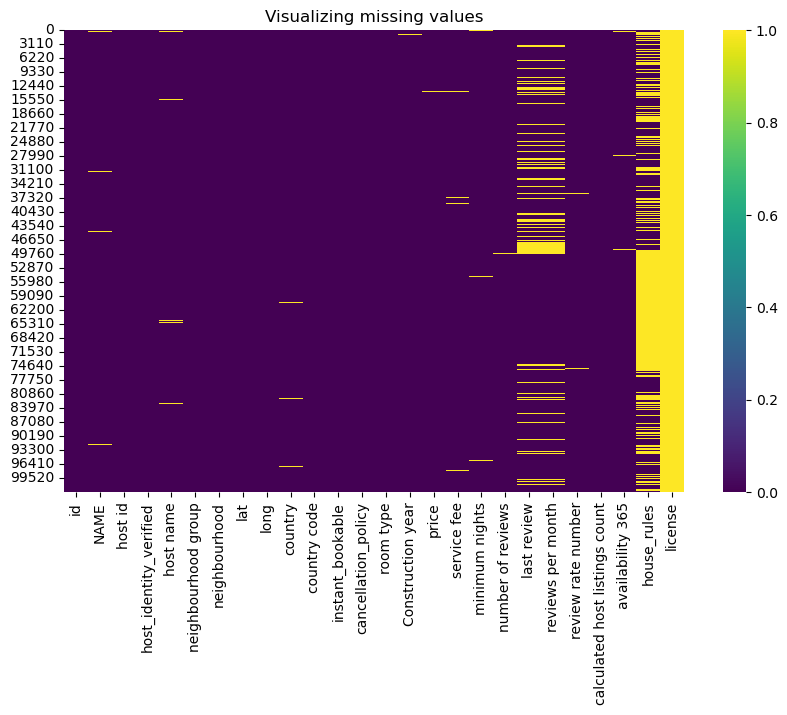

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Visualizing missing values')
plt.show()

In [6]:
# Viewing missing values in each column
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
# Dropping columns with most missing values.
dropped_columns = ['NAME','host name', 'house_rules','country','country code',
                   'license', 'last review', 'reviews per month']
df.drop(columns= dropped_columns, axis=1, inplace=True)
df

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0
2,1002403,78829239556,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,1.0,352.0
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0,1.0,322.0
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,12312296767,verified,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,3.0,1.0,227.0
102595,6092990,77864383453,unconfirmed,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2.0,2.0,395.0
102596,6093542,69050334417,unconfirmed,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,5.0,1.0,342.0
102597,6094094,11160591270,unconfirmed,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,3.0,1.0,386.0


In [8]:
df['price'] = df['price'].replace('[\$,]','',regex=True)

In [9]:
print(f"Before: {df['price'].dtype}")
df['price'] = df['price'].astype('float64')

Before: object


In [10]:
price_mean = df['price'].mean()
df['price'] = df['price'].fillna(price_mean)

In [11]:
print(f"After: {df['price'].dtype}")
print(df['price'].head())

After: float64
0    966.0
1    142.0
2    620.0
3    368.0
4    204.0
Name: price, dtype: float64


In [12]:
df['service fee'] = df['service fee'].replace('[\$,]','',regex=True)

In [13]:
print(f"Before: {df['service fee'].dtype}")
df['service fee'] = df['service fee'].astype('float64')

Before: object


In [14]:
service_fee_median = df['service fee'].median()
df['service fee'] = df['service fee'].fillna(service_fee_median)

In [15]:
print(f"After: {df['service fee'].dtype}")
print(df['service fee'].head())

After: float64
0    193.0
1     28.0
2    124.0
3     74.0
4     41.0
Name: service fee, dtype: float64


In [16]:
df.isnull().sum()

id                                  0
host id                             0
host_identity_verified            289
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                               0
service fee                         0
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

In [17]:
# Handling missing values in other columns
minimum_nights_median = df['minimum nights'].median()
df['minimum nights'] = df['minimum nights'].fillna(minimum_nights_median)

df['number of reviews'] = df['number of reviews'].fillna(0).astype('float64')

review_rate_number_mean = df['review rate number'].median()
df['review rate number'] = df['review rate number'].fillna(review_rate_number_mean)

calculated_host_median = df['calculated host listings count'].median()
df['calculated host listings count'] = df['calculated host listings count'].fillna(calculated_host_median)

df['availability 365'] = df['availability 365'].fillna(0).astype('float64')

In [18]:
df.isnull().sum()

id                                  0
host id                             0
host_identity_verified            289
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
review rate number                  0
calculated host listings count      0
availability 365                    0
dtype: int64

In [19]:
#df.fillna('', inplace=True)
print(df['minimum nights'].isnull().sum())
print(df['number of reviews'].isnull().sum())
print(df['review rate number'].isnull().sum())
print(df['calculated host listings count'].isnull().sum())
print(df['availability 365'].isnull().sum())

0
0
0
0
0


In [20]:
# Removing duplicates across all rows
print(f'Before: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'After: {df.shape}')
# Duplicate values were dropped. There were total of 541 duplicate values.

Before: (102599, 18)
After: (102058, 18)


In [21]:
print(df.columns)

Index(['id', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


In [22]:
df

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,4.0,6.0,286.0
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,4.0,2.0,228.0
2,1002403,78829239556,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,5.0,1.0,352.0
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.0,1.0,322.0
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,77326652202,unconfirmed,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,NaN,696.0,125.0,7.0,12.0,5.0,1.0,0.0
102054,57365760,45936254757,verified,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,NaN,909.0,125.0,1.0,19.0,3.0,2.0,0.0
102055,57366313,23801060917,verified,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,NaN,387.0,125.0,2.0,50.0,4.0,2.0,235.0
102056,57366865,15593031571,unconfirmed,Manhattan,Harlem,40.81248,-73.94317,True,strict,Private room,NaN,848.0,125.0,2.0,0.0,1.0,1.0,0.0


## Normalizing Data And Handling Outliers

In [24]:
# Columns for outlier handling and normalization
outlier_cols = ['price', 'minimum nights', 'number of reviews', 'calculated host listings count']
log_transform_cols = ['minimum nights', 'calculated host listings count']

In [26]:
for col in outlier_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    
    df[col] = df[col].clip(lower=lower, upper=upper)

In [28]:
# Applying log(1 + x) transformation to handle skewness
for col in log_transform_cols:
    df[col] = np.log1p(df[col])  

In [29]:
# Applying Min-Max Scaler
scaler = MinMaxScaler()
df[outlier_cols] = scaler.fit_transform(df[outlier_cols])
print(df[outlier_cols].head())

      price  minimum nights  number of reviews  calculated host listings count
0  0.803017        0.651533           0.038793                        0.425053
1  0.071872        0.900470           0.193966                        0.164768
2  0.496007        0.320967           0.000000                        0.000000
3  0.272405        0.900470           1.000000                        0.000000
4  0.126886        0.651533           0.038793                        0.000000


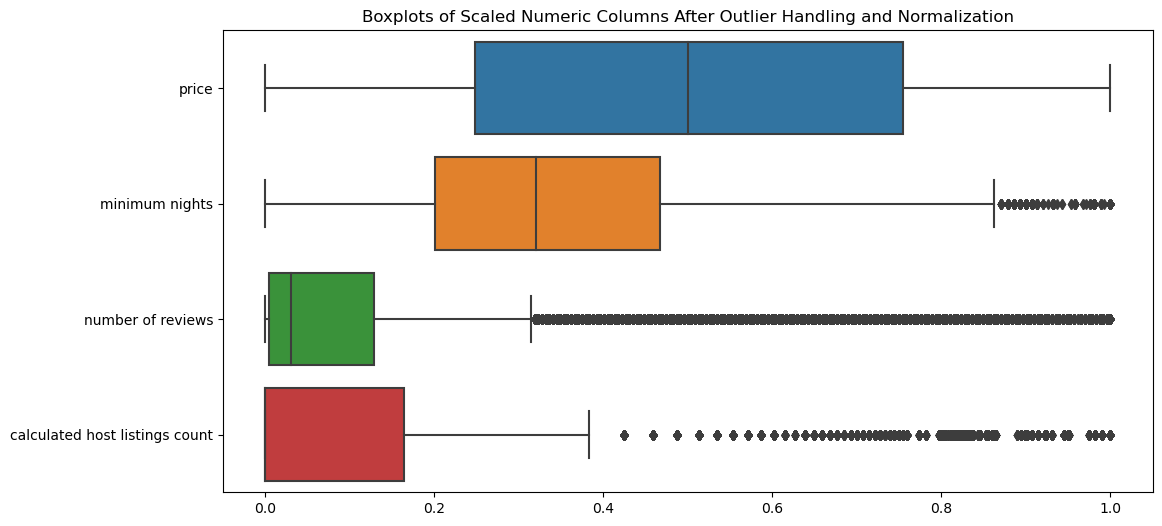

In [30]:
# Visualizing the scaled columns with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[outlier_cols], orient='h')
plt.title('Boxplots of Scaled Numeric Columns After Outlier Handling and Normalization')
plt.show()

# Visualizing Data

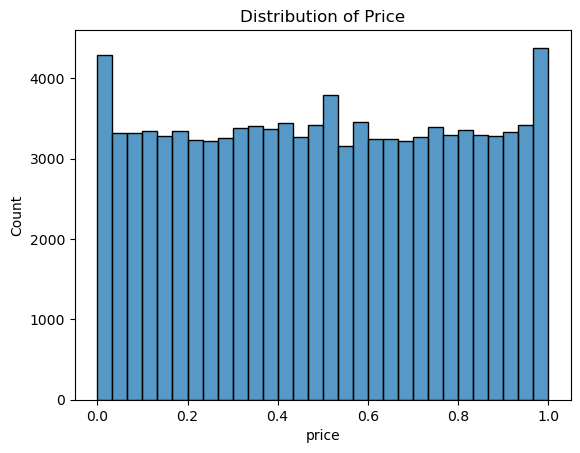

In [31]:
# Showing the distribution of price column
sns.histplot(df['price'],bins=30)
plt.title('Distribution of Price')
plt.show()

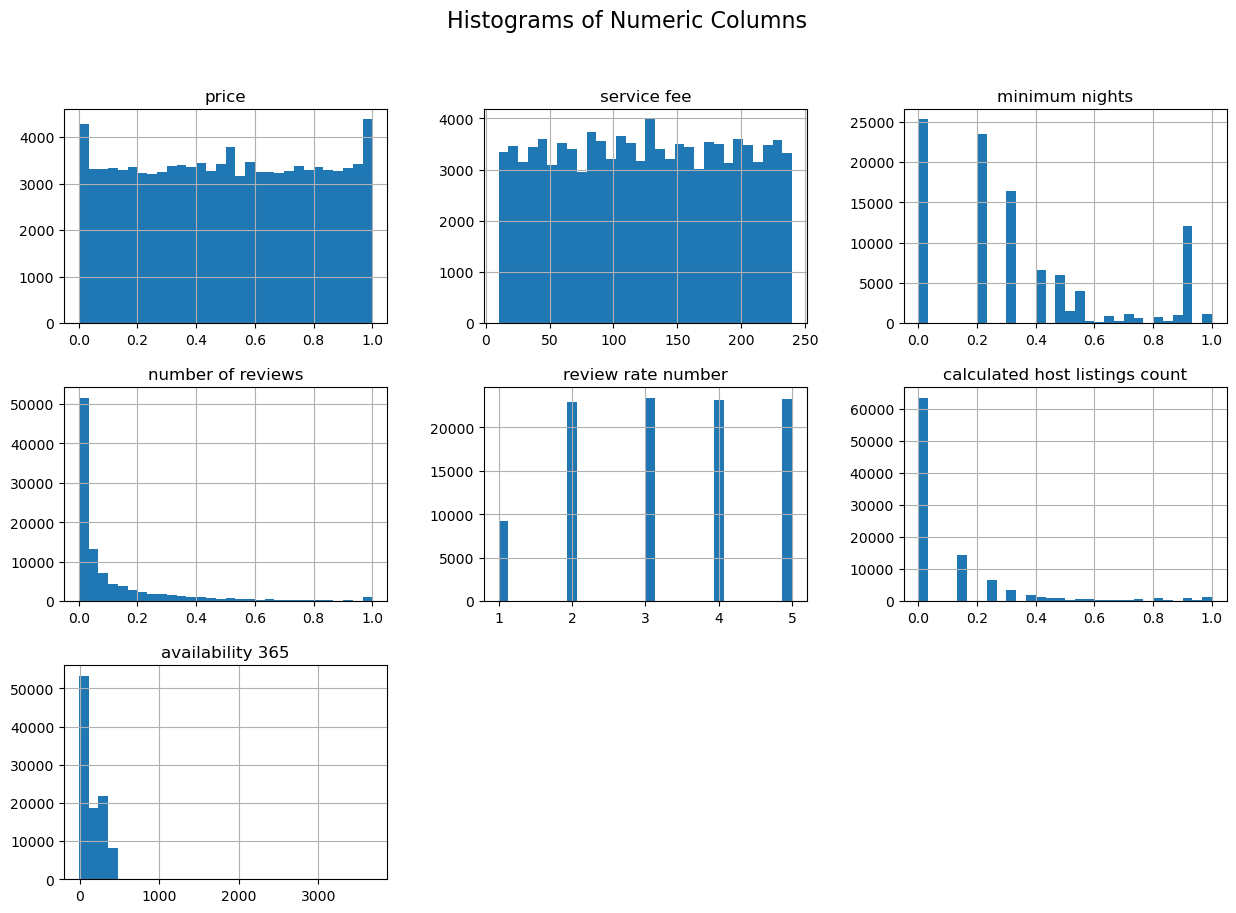

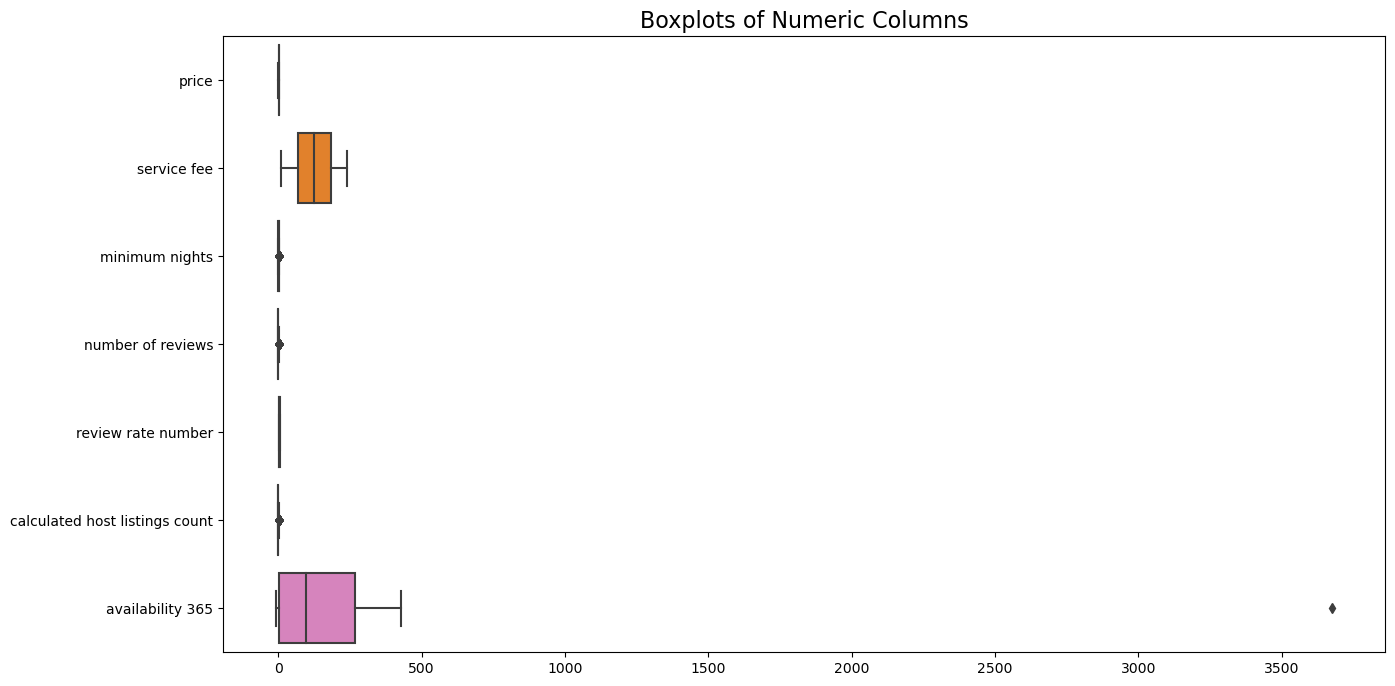

In [39]:
numeric_cols = ['price', 'service fee', 'minimum nights', 'number of reviews',
                'review rate number', 'calculated host listings count', 'availability 365']

# Plotting histograms for Numeric Columns
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.show()

# Plotting boxplots for Outliers Detection
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Boxplots of Numeric Columns', fontsize=16)
plt.show()

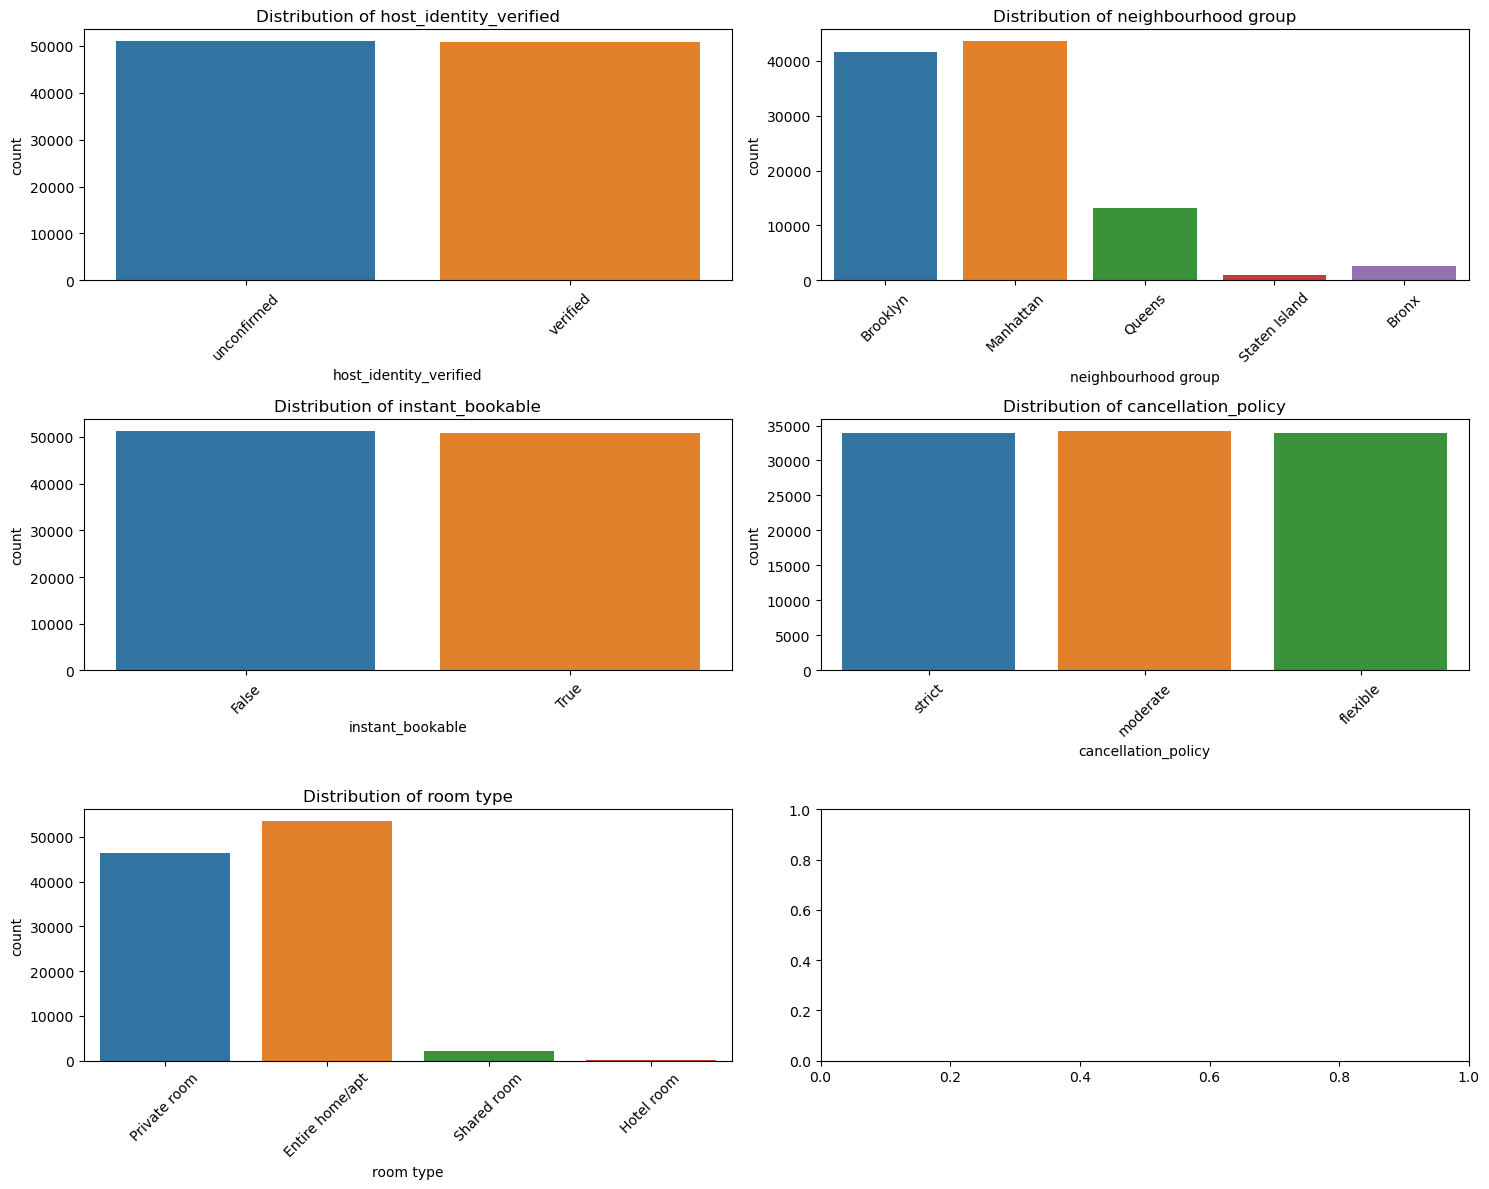

In [47]:
categorical_cols = ['host_identity_verified', 'neighbourhood group', 
                    'instant_bookable', 'cancellation_policy', 'room type']

# Plotting count plots for each categorical column
fig, axes = plt.subplots(3, 2, figsize=(15, 12)) 
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

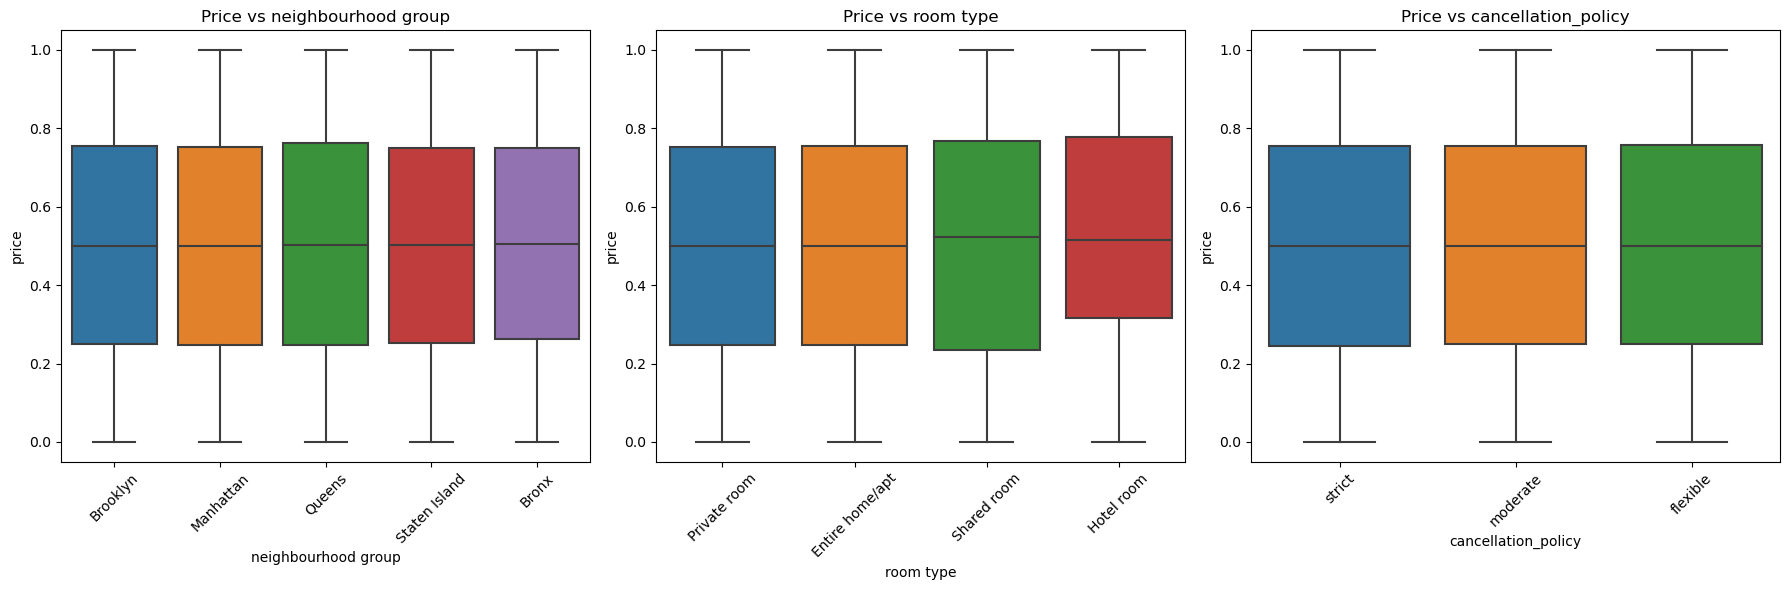

In [41]:
# Boxplots of price against categorical columns
categorical_cols_to_compare = ['neighbourhood group', 'room type', 'cancellation_policy']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust grid size as needed

for i, col in enumerate(categorical_cols_to_compare):
    sns.boxplot(data=df, x=col, y='price', ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='Construction year', ylabel='price'>

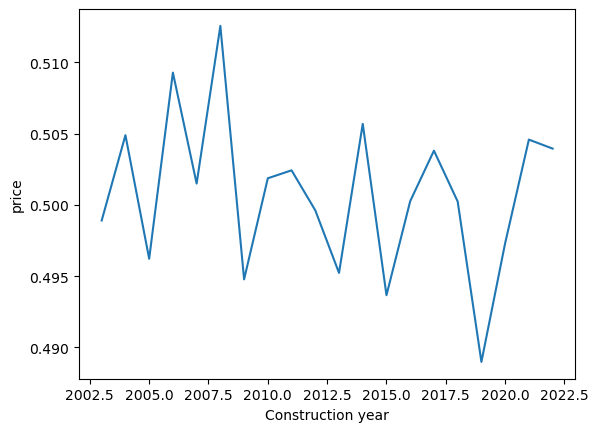

In [51]:
avg_price_per_year = df.groupby('Construction year')['price'].mean().reset_index()
sns.lineplot(x='Construction year', y='price', data=avg_price_per_year)

In [54]:
df['price'].tail()

102053    0.563443
102054    0.752440
102055    0.289264
102056    0.698314
102057    0.946761
Name: price, dtype: float64

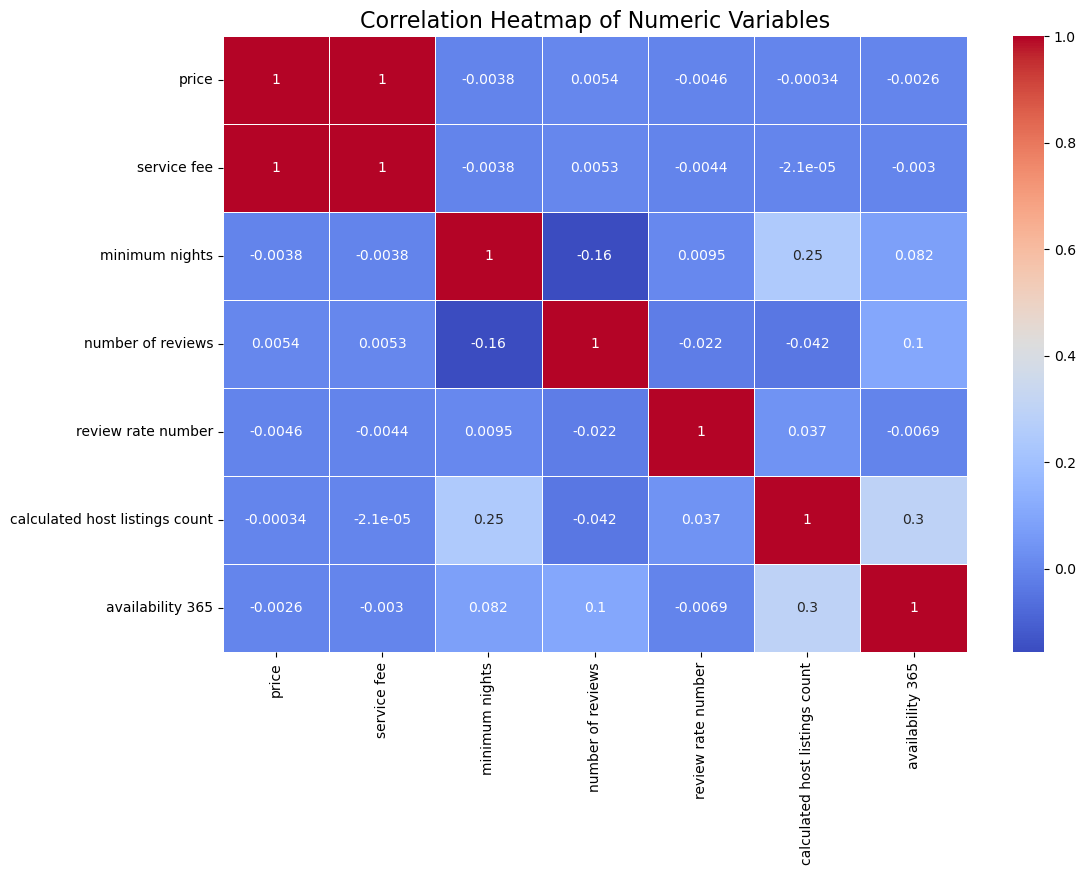

In [50]:
# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.show()

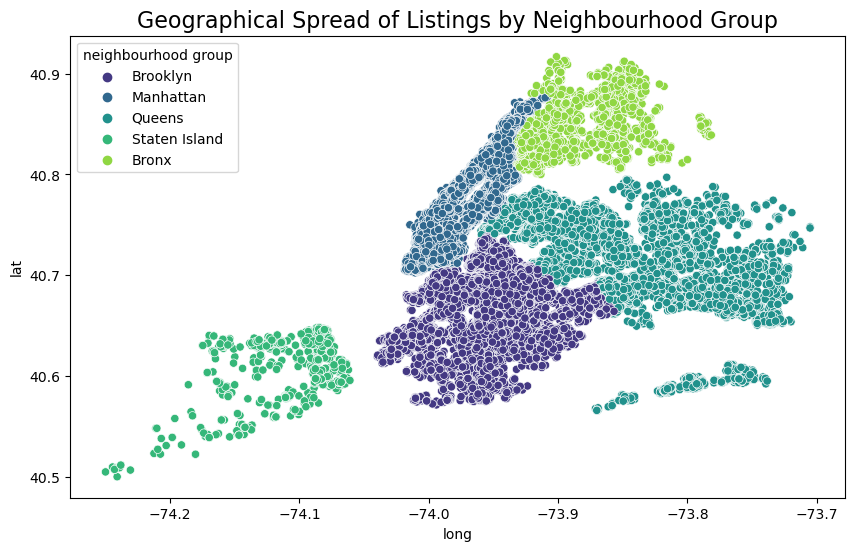

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='long', y='lat', hue='neighbourhood group', palette='viridis')
plt.title('Geographical Spread of Listings by Neighbourhood Group', fontsize=16)
plt.show()

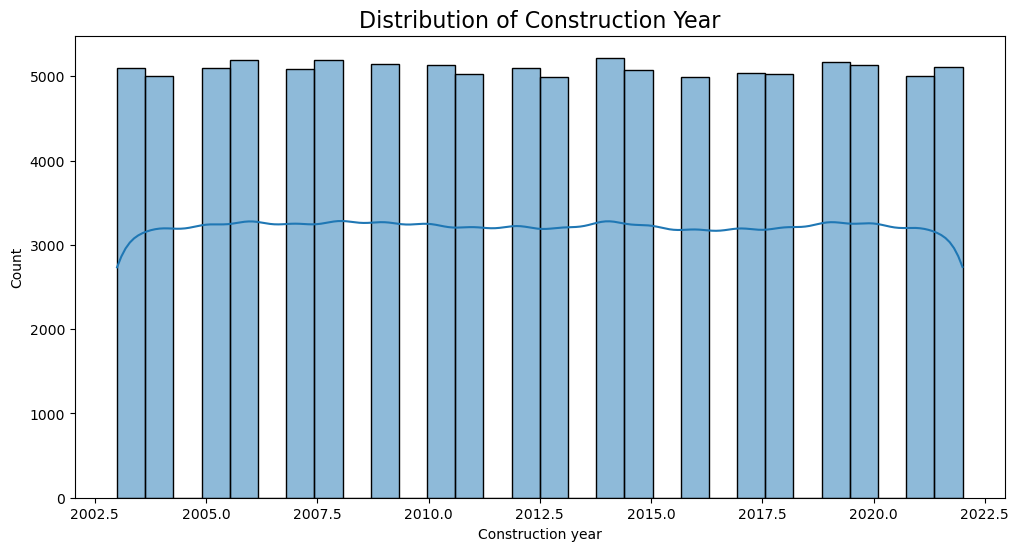

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Construction year', bins=30, kde=True)
plt.title('Distribution of Construction Year', fontsize=16)
plt.show()

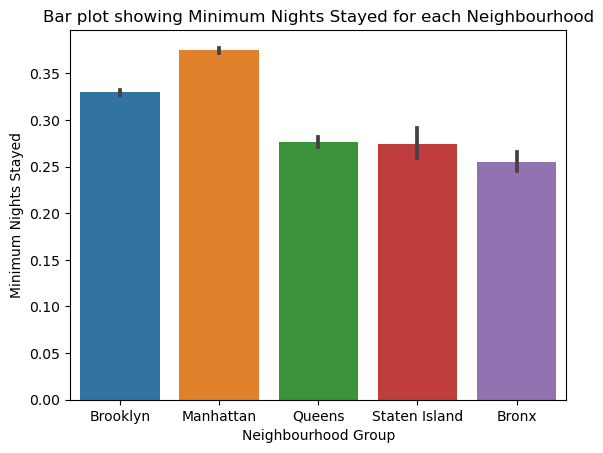

In [38]:
sns.barplot(x='neighbourhood group', y='minimum nights', data=df)
plt.title('Bar plot showing Minimum Nights Stayed for each Neighbourhood')
plt.ylabel('Minimum Nights Stayed')
plt.xlabel('Neighbourhood Group')
plt.show()

In [23]:
# Saving Cleaned Data in a new file:
df.to_csv('new_airbnb.csv')